In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import pandas as pd
df1 = pd.read_csv('/Users/Surface/Downloads/Dataset_5971.csv')
df2 = pd.read_csv('/Users/Surface/Downloads/Fundamental Studio A/train.csv')


In [32]:
df1 = df1[['LABEL', 'TEXT']].copy()

In [33]:
df1.columns = df1.columns.str.lower()

In [34]:
df1

,label,text
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,Smishing,Please Stay At Home. To encourage the notion o...
...,...,...
5966,ham,:( but your not here....
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...
5968,ham,Its a valentine game. . . send dis msg to all ...
5969,ham,We r outside already.


In [29]:
df1_label = df1['label'].value_counts()
print(df1_label)


label
ham         4844
smishing     638
spam         489
Name: count, dtype: int64


In [9]:
df2 = df2.rename(columns={'sms': 'text'})
df2 = df2[['label', 'text']]z
df2['label'] = df2['label'].replace({1: 'smishing', 0: 'ham'})

In [10]:
df2

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,smishing,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,smishing,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?\n
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [11]:
df3 = pd.concat([df1, df2], ignore_index=True).drop_duplicates()


In [12]:
df3

,label,text
0,ham,your opinion about me? 1. over 2. jada 3. kusr...
1,ham,what's up? do you want me to come online? if y...
2,ham,so u workin overtime nigpun?
3,ham,"also sir, i sent you an email about how to log..."
4,smishing,please stay at home. to encourage the notion o...
...,...,...
11540,smishing,This is the 2nd time we have tried 2 contact u...
11541,ham,Will ü b going to esplanade fr home?\n
11542,ham,"Pity, * was in mood for that. So...any other s..."
11543,ham,The guy did some bitching but I acted like i'd...


In [13]:
df3.isnull().sum()

label    0
text     0
dtype: int64

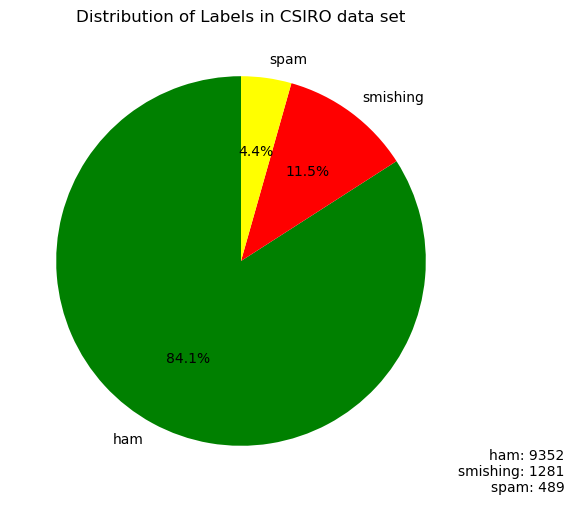

In [14]:
counts = df3['label'].value_counts()

colour = {
    'ham': 'green',
    'spam': 'yellow',
    'smishing': 'red'
}

colors = [colour[label] for label in counts.index]


plt.figure(figsize=(10, 6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Labels in CSIRO data set')
plt.ylabel('') 
annotations = "\n".join([f"{label}: {count}" for label, count in counts.items()])
plt.annotate(annotations, xy=(1.2, 0), xycoords='axes fraction', fontsize=10, ha='right')
plt.show()


from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(stop_words='english', max_features=5000)
X = v.fit_transform(df3['text'])
y = df3['label']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()


model.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [24]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df3['text'])
y = df3['label']

In [25]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9312359550561797

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1857
    smishing       0.78      0.72      0.75       283
        spam       0.16      0.14      0.15        85

    accuracy                           0.93      2225
   macro avg       0.64      0.62      0.63      2225
weighted avg       0.93      0.93      0.93      2225

